<a href="https://colab.research.google.com/github/peartt/cse480-notebooks/blob/master/11_3_Are_You_SATisfied.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solving Problems with Propositional Logic

All you need to do is encode the puzzle as a (potentially very large) compound logical proposition!

For example ...


## A Famous Logic Puzzle

Five men with different nationalities and with different jobs live in consecutive houses on a street. These houses are painted different colors. The men have different pets and have different favorite drinks. Determine who owns a zebra and whose favorite drink is water (which is one of the favorite drinks) given these clues:

1. The Englishman lives in the red house.
2. The Spaniard owns a dog.
3. The Japanese man is a painter.
4. The Italian drinks tea.
5. The Norwegian lives in the first house on the left.
6. The green house is immediately to the right of the white one.
7. The photographer breeds kittens.
8. The diplomat lives in the yellow house.
9. Milk is drunk in the middle house.
10. The owner of the green house drinks coffee.
11. The Norwegian's house is next to the blue one.
12. The violinist drinks orange juice.
13. The fox is in a house next to that of the physician.
14. The horse is in a house next to that of the diplomat.

In [ ]:
!curl -O https://rickneff.github.io/zebra.c > /dev/null 2>&1

In [ ]:
!head -315 zebra.c

In [ ]:
!cc -E zebra.c | grep -v '^#' | grep -v '^$' > zebra_v155_c1135.cnf

In [ ]:
!cat zebra_v155_c1135.cnf

## CNF

Recall the discussion in Section 16.3 starting on page 248 that includes Definition 16.3:

A variable or its negation is called a *literal*.

A Boolean formula in *conjunctive normal form* (CNF) is a conjunction of clauses.

It is a $2CNF$ formula if it is a conjunction of 2-Clauses and a $3CNF$ formula if it is a conjunction of 3-Clauses.

A 2-Clause is a disjunction of two literals, and a 3-Clause is a disjunction of three literals.

A 2-Clause is equivalent to a conjunction of two implications. 


Note that logical expressions are easiest to understand if the most natural logical operations are used. For example, conditionals (implications) that give necessary and/or sufficient conditions for some events. Use the logical equivalence

$a \rightarrow b \equiv \lnot a \lor b$

to convert conditionals to their equivalent normal form.

### 3COLOR is NP-Complete

Here's a fairly simple example of how to do an NP-Completeness proof, which requires the following steps:



1. Describe the problem as a language.
2. Show that the language is in NP.
3. Select a known NP-complete problem XYZ.
4. Construct a transformation f from XYZ to the new (unknown) language.
5. Prove both directions of the transformation (if and only if).
6. Prove that f is a polynomial time transformation (reduction).

3COLOR is defined as the set of all graphs that are colorable with 3 colors.

That 3COLOR is NP-Complete is proved by reduction from $SAT$.

Transform any graph $G$ with vertex set $\{v_i\ |\ i = 1,\ldots,n \}$
into a $CNF$ Boolean formula by letting the variables

* $r_i = 1$ if color$(v_i) =$ red, 0 otherwise;
* $g_i = 1$ if color$(v_i) =$ green, 0 otherwise;
* $b_i = 1$ if color$(v_i) =$ blue, 0 otherwise;

Then for each vertex $v_i \in G$ generate the clause $(r_i \lor g_i \lor b_i)$
and for each edge $(v_i, v_j) \in G$ generate the clause

$(\overline{r_i} \lor \overline{r_j}) \land
(\overline{g_i} \lor \overline{g_j}) \land
(\overline{b_i} \lor \overline{b_j})$.

Graph $G$ having $n$ vertices implies this transformation takes no more than $n^2$ steps.

Graph $G$ is three-colorable if and only if the generated Boolean formula is satisfiable.

### TODO In-Class Exercise

First, identify each of the steps (1-6) in the phrasing of the above proof.

1.   3Color is defined as the set of all graphs that are colarable with 3 colors.
2.   3Color is NP-Complete is proved by reduction from SAT
3.   CNF boolean formula
4.   Transform any graph $G$ with vertex set $\{v_i\ |\ i = 1,\ldots,n \}$
into a $CNF$ Boolean formula by letting the variables

  * $r_i = 1$ if color$(v_i) =$ red, 0 otherwise;
  * $g_i = 1$ if color$(v_i) =$ green, 0 otherwise;
  * $b_i = 1$ if color$(v_i) =$ blue, 0 otherwise;

  Then for each vertex $v_i \in G$ generate the clause $(r_i \lor g_i \lor b_i)$
  and for each edge $(v_i, v_j) \in G$ generate the clause

  $(\overline{r_i} \lor \overline{r_j}) \land
  (\overline{g_i} \lor \overline{g_j}) \land
  (\overline{b_i} \lor \overline{b_j})$.
5.  Graph $G$ is three-colorable if and only if the generated Boolean formula is satisfiable.
6.   Graph $G$ having n vertices implies this transformation takes no more than $n^2$ steps.

Next, determine which of the following graphs is in 3COLOR, and which is not.

#### Graph A

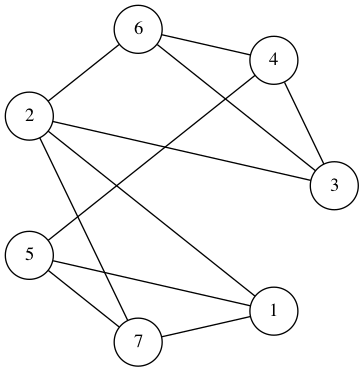

#### Graph B

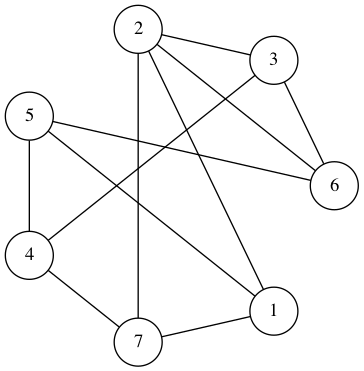

This is 3 colorable.

| Vertex | Color|
|---|---|
|1 | Green |
| 2 | Red|
| 3 | Blue| 
| 4 | Green|
|5|Red|
|6|Green|
|7| Blue |

## A Brute Force SAT Solver

In [ ]:
vardict = {'a':1, 'b':0, 'c':1, 'd':0, 'e': 1, 'f': 0}

In [ ]:
import functools, math, operator, sys
if sys.version_info >= (3, 8):
  product = math.prod
else:
  product = functools.partial(functools.reduce, operator.mul)

def make_literal(name):
  name_l = name.lower()
  globals()[name_l] = name_l
  name_u = name.upper()
  globals()[name_u] = name_u
  return (name_l, name_u)

def init_literals():
  global vardict
  return list(map(make_literal, vardict.keys()))

def set_vars(var_assignments_str):
  """Take a string of the form 'a=1 b=0' to update
     the vardict.
  """
  global vardict
  for var_assignment in var_assignments_str.split():
    var, val = var_assignment.split('=')
    vardict[var] = int(val)

def setv(var, val):
  global vardict
  vardict[var] = val
  return f'{var}={val}'

def assign_vars(n):
  """Assign vars in vardict according to
     to the binary representation of n.

     assign_vars(0) will set all vars to 0.

     assign_vars(63) will set all 6 vars (2^6 - 1 = 63) to 1.
  """
  bits = bin(n)[::-1]
  l = len(bits)
  seen_b = False
  vars = list(vardict.keys())
  vars.reverse()
  for i, var in enumerate(vars):
    if i < l:
      bit = bits[i]
    if bit == 'b':
      seen_b = True
    setv(var, 0 if seen_b else int(bit))

def getv(var):
  """Get the value of var, returns the value of var in vardict (0 or 1).
  """
  global vardict
  varl = var.lower()
  return vardict[var] if var == varl and var in vardict else 1 - getv(varl)

def flip(var):
  """Flip (invert) the value of a literal, to turn a 0 into a 1
     and a 1 into a 0.
  """
  vardict[var] = 0 if getv(var) else 1

def eval_cnf(formula):
  vals = [list(map(getv, clause)) for clause in formula]
  print(vals)
  return 1 if product(map(sum, vals)) else 0

def eval_dnf(formula):
  vals = [list(map(getv, clause)) for clause in formula]
  print(vals)
  return 1 if sum(map(product, vals)) else 0

In [ ]:
vardict

In [ ]:
list(vardict.keys())

In [ ]:
init_literals()

In [ ]:
' '.join([setv(a, 0), setv(b, 0)])

In [ ]:
assign_vars(61)

In [ ]:
formula1 = ((a, b, c), (a, B, c), (A, B, c), (e, f))

In [ ]:
[list(map(getv, clause)) for clause in formula1]

In [ ]:
flip(a)

In [ ]:
[list(map(getv, clause)) for clause in formula1]

In [ ]:
set_vars('a=1 b=0')

In [ ]:
[list(map(getv, clause)) for clause in formula1]

In [ ]:
eval_cnf(formula1)

In [ ]:
set_vars('e=1')

In [ ]:
eval_dnf(formula1)

In [ ]:
set_vars('f=1')

In [ ]:
flip(f)

In [ ]:
def get_satisfying_assignments(formula, first_only=False):
  global vardict
  all_satisfying_assignments = []
  l = 2 ** len(vardict.keys())
  for n in range(l):
    assign_vars(n)
    if eval_cnf(formula):
      if first_only:
        return vardict.copy()
      else:
        all_satisfying_assignments.append(vardict.copy())
  return None if first_only else all_satisfying_assignments

In [ ]:
formula1

In [ ]:
vardict

In [ ]:
get_satisfying_assignments(formula1)

# Explore the Soos SAT Solver

We can feed these Boolean formulas to [CryptoMiniSat by Mate Soos](https://msoos.github.io/cryptominisat_web) by converting them to the [DIMACS](https://en.wikipedia.org/wiki/DIMACS) format:

In [ ]:
def to_DIMACS(formula):
  global vardict
  literals = dict([(v, i + 1) for i, v in enumerate(vardict.keys())])
  print(f'p cnf {len(literals)} {len(formula)}')
  for clause in formula:
    for literal in clause:
      if literal.isupper():
        print('-', end='')
      print(f'{literals[literal.lower()]} ', end='')
    print('0')

In [ ]:
formula1

In [ ]:
%%capture cap
to_DIMACS(formula1)

In [ ]:
cap.show()

# Alternative to Browser Interaction

If you prefer not to copy/paste!

In [ ]:
!pip install pycryptosat

In [ ]:
from pycryptosat import Solver

def to_Solver(formula, solver=Solver()):
  global vardict
  literals = dict([(v, i + 1) for i, v in enumerate(vardict.keys())])
  def get_var_num(literal):
    num = literals[literal.lower()]
    if literal.isupper():
      num = -num
    return num
  for clause in formula:
    solver.add_clause(list(map(get_var_num, clause)))
  return solver

In [ ]:
s = to_Solver(formula1)

In [ ]:
sat, solution = s.solve()

In [ ]:
sat

In [ ]:
solution

# A Familiar Logic Puzzle

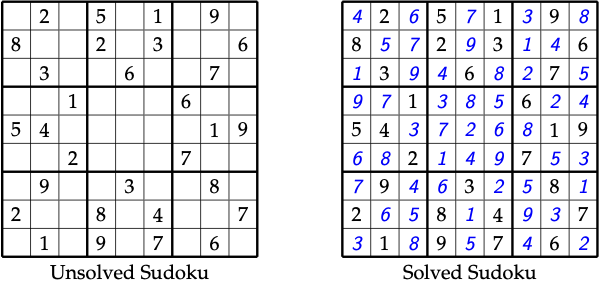

## How do we model Sudoku in propositional logic?!

Let $p(i, j, n)$ be the proposition (true or false) that the cell at row $i$, column $j$ contains the number $n$.

The three variables ($i$, $j$, and $n$) all range from $1$ to $9$, hence there are $9 \cdot 9 \cdot 9 = 729$ such propositions --- some of which are "given" (these are the initial hints).

### What are the constraints?

We need to form the conjunction of four different assertions:

#### Every row contains every number

$$\bigwedge_{i=1}^{9} \bigwedge_{n=1}^{9} \bigvee_{j=1}^{9} p(i, j, n)$$


In [ ]:
from pycryptosat import Solver
s = Solver(verbose=15)

In [ ]:
list(map(lambda c: s.add_clause(c), 
         [[int(f'{i}{j}{n}')]
         for i in range(1, 10)
           for n in range(1, 10)
             for j in range(1, 10)]))
s.nb_clauses()

#### Every column contains every number

$$\bigwedge_{j=1}^{9} \bigwedge_{n=1}^{9} \bigvee_{i=1}^{9} p(i, j, n)$$

In [ ]:
list(map(lambda c: s.add_clause(c), 
         [[int(f'{i}{j}{n}')]
         for j in range(1, 10)
           for n in range(1, 10)
             for i in range(1, 10)]))
s.nb_clauses()

#### Each of the nine 3x3 blocks contains every number

This is tricky.

$$\bigwedge_{r=0}^{2} \bigwedge_{s=0}^{2} \bigwedge_{n=1}^{9} \bigvee_{i=1}^{3} \bigvee_{j=1}^{3} p(3r + i, 3s + j, n)$$

In [ ]:
list(map(lambda c: s.add_clause(c),
         [[int(f'{3*r+i}{3*s+j}{n}')]
         for r in range(3)
           for s in range(3)
             for n in range(1, 10)
               for i in range(1, 4)
                 for j in range(1, 4)]))
s.nb_clauses()

#### No cell contains more than one number

Recall that for two propositional variables $x$ and $y$,

$\lnot (x \land y) \equiv \lnot x \lor \lnot y \equiv x \rightarrow \lnot y$.

Take the conjunction over all values of $n$, $m$, $i$, and $j$ of

$p(i, j, n) \rightarrow \lnot p(i, j, m)$

where each variable ranges from $1$ to $9$ and $n \ne m$.


$$\bigwedge^{9}_{i=1} \bigwedge^{9}_{j=1} \bigwedge^{8}_{n=1} \bigwedge^{9}_{m=n+1} \lnot p(i, j, n) \lor \lnot p(i, j, m)$$


In [ ]:
list(map(lambda c: s.add_clause(c),
         [[int(f'-{i}{j}{n}'), int(f'-{i}{j}{m}')]
         for i in range(1, 10) 
           for j in range(1, 10)
             for n in range(1, 9)
               for m in range(n+1, 10)]))
s.nb_clauses()

In [ ]:
print(s.solve())

#### Starting Grids

In [ ]:
sudoku_9x9_grid1 = [[0,5,0,0,0,7,0,0,0],
                    [0,0,8,0,0,0,0,0,0],
                    [7,0,2,6,0,0,0,5,0],
                    [0,0,0,0,0,3,7,0,0],
                    [0,0,6,1,0,0,0,0,2],
                    [0,0,0,0,0,4,0,0,0],
                    [0,4,7,0,0,8,0,0,9],
                    [0,9,0,5,0,0,0,0,1],
                    [2,0,0,7,0,0,0,8,5]]

sudoku_9x9_grid2 = [[0,0,0,0,0,5,0,7,8],
                    [0,8,0,6,2,0,1,0,0],
                    [2,0,5,0,4,8,0,0,3],
                    [7,0,2,0,0,3,4,0,0],
                    [0,0,0,0,0,0,0,0,0],
                    [0,0,4,8,0,0,9,0,2],
                    [6,0,0,3,1,0,8,0,4],
                    [0,0,8,0,5,6,0,1,0],
                    [1,7,0,2,0,0,0,0,0]]

sudoku_9x9_grid3 = [[0,0,0,0,0,5,0,7,8],
                    [0,8,0,6,2,0,1,0,0],
                    [2,0,5,0,4,8,0,0,3],
                    [7,0,2,0,0,3,4,0,0],
                    [0,0,0,0,0,0,0,0,0],
                    [0,0,4,8,0,0,9,0,2],
                    [6,0,0,3,1,0,8,0,4],
                    [0,0,8,0,5,6,0,1,0],
                    [1,7,0,2,0,0,0,0,0]]

sudoku_9x9_grid4 = [[9,1,8,7,0,0,0,3,0],
                    [0,3,2,6,0,9,0,8,0],
                    [0,0,7,2,8,0,9,1,0],
                    [0,8,6,0,3,0,1,7,0],
                    [3,0,4,0,0,0,0,5,6],
                    [0,5,1,0,2,0,8,4,3],
                    [1,0,9,0,5,0,3,2,0],
                    [0,2,5,3,0,1,4,9,0],
                    [0,0,3,0,0,2,0,6,1]]

In [ ]:
def add_hints(grid, solver):
  def get_val(r, c):
    n = grid[r][c]
    return n if n else ''
  vars = [int(f'{r+1}{c+1}{get_val(r, c)}')
           for r in range(9)
             for c in range(9)]
  for var in vars:
    if var > 100:
      solver.add_clause([var])
  return solver.nb_clauses()

In [ ]:
add_hints(sudoku_9x9_grid4, s)

In [ ]:
print(s.solve())